In [1]:
import numpy as np

import fenics as fn
import gwflow as gwf

In [2]:
np.random.seed(123)

In [3]:
gw_parameters = {'extent': (2,1),
                 'resolution': (50, 25),
                 'sources_and_sinks': '0.1',
                 'pumping_rates': [-0.1, -0.05],
                 'pumping_locations': [(1.5, 0.5), (0.25, 0.75)]}

conductivity_parameters = {'conductivity_kernel': gwf.Matern32,
                           'conductivity_lambda': 0.1,
                           'conductivity_mkl': 256,
                           'conductivity_mean': -2,
                           'conductivity_stdev': 1}

parameters = {**gw_parameters, **conductivity_parameters, 'solver_parameters': None}

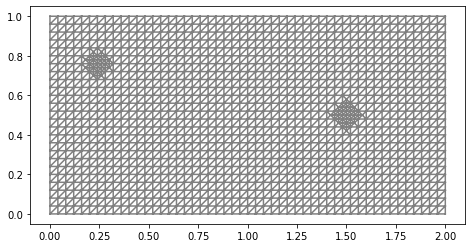

In [4]:
my_model = gwf.DefaultModel(parameters, confined=True)

my_model.plot_mesh()

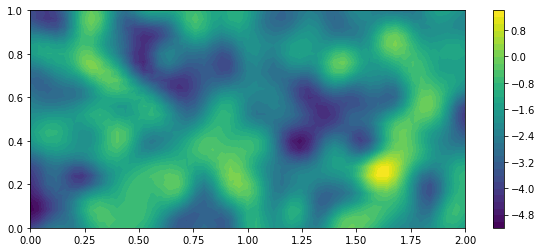

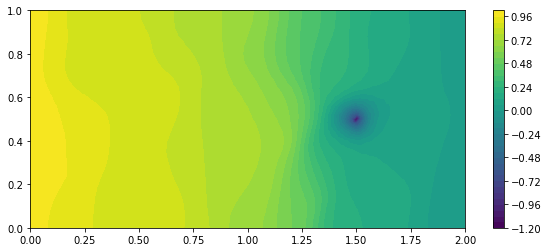

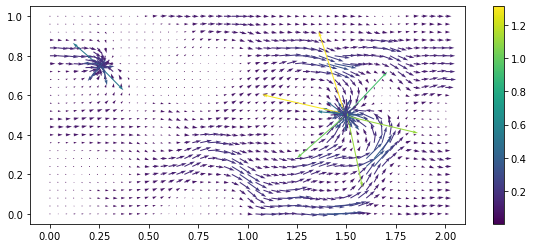

In [5]:
coefficients = np.random.normal(size=conductivity_parameters['conductivity_mkl'])
my_model.solve(coefficients)

my_model.plot_conductivity()
my_model.plot_head()
my_model.plot_flux()

In [6]:
my_model.solver.mesh.hmax()

0.05656854249492385

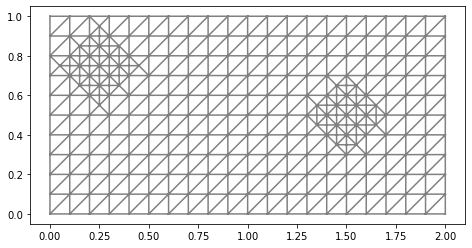

In [7]:
my_reduced_model = gwf.ReducedModel(my_model, (20,10))

my_reduced_model.plot_mesh()

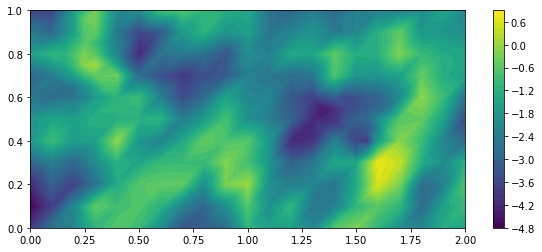

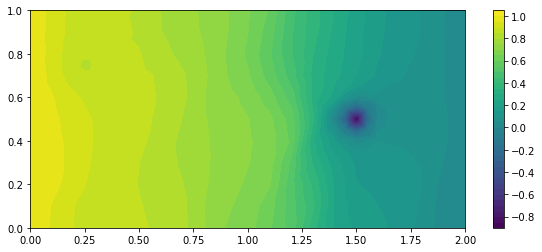

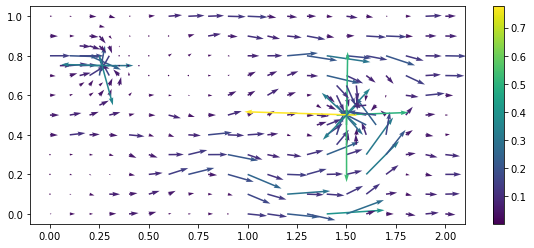

In [8]:
my_reduced_model.solve(coefficients)

my_reduced_model.plot_conductivity()
my_reduced_model.plot_head()
my_reduced_model.plot_flux()

In [9]:
bbs_coefficients = np.random.normal(size=16)
bbs_parameters = {'bbs_kernel': gwf.ARD_Squared,
                  'bbs_lambda': (0.1, 0.5),
                  'bbs_mkl': 16,
                  'bbs_mean': -1.0,
                  'bbs_stdev': 0.1,
                  'bbs_coefficients': bbs_coefficients}

solver_parameters = {'newton_solver': {'relative_tolerance': 1e-9,
                                       'absolute_tolerance': 1e-12,
                                       'maximum_iterations': 100,
                                       'relaxation_parameter': 1.0}}

parameters = {**parameters, **bbs_parameters}
parameters['solver_paraemeters'] = solver_parameters

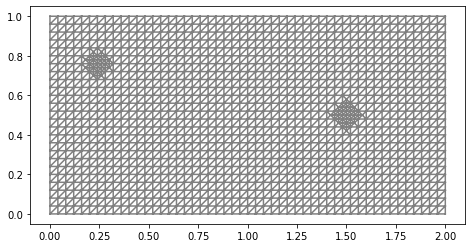

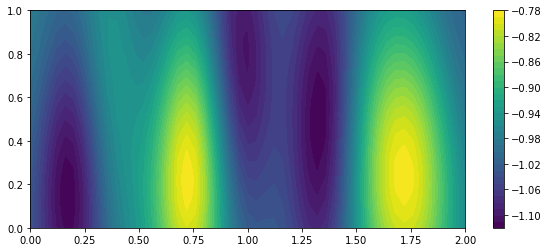

In [10]:
my_unconfined_model = gwf.DefaultModel(parameters, confined=False)

my_unconfined_model.plot_mesh()
my_unconfined_model.plot_bottom_bounding_surface()

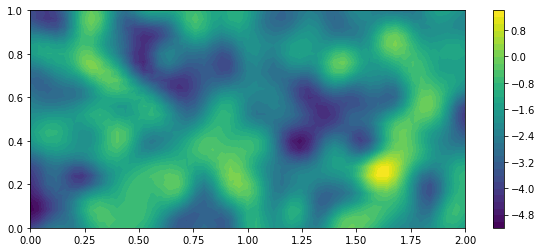

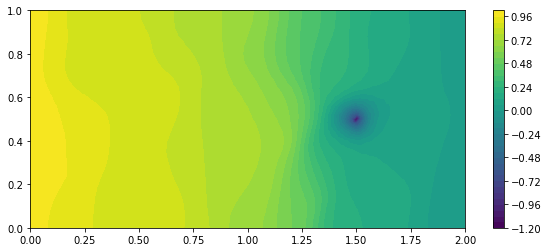

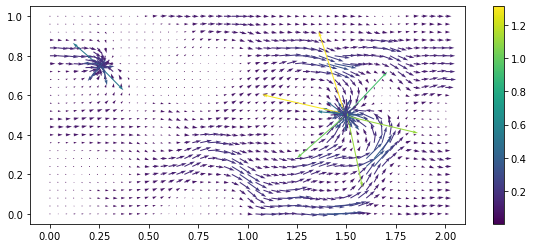

In [11]:
my_model.solve(coefficients)

my_model.plot_conductivity()
my_model.plot_head()
my_model.plot_flux()